# <center>COMPUTATIONAL SYSTEMS BIOLOGY </center>

## <center>EXERCISES - GENE REGULATORY CIRCUITS</center>
#### <center> Author: Maria Lucia Romero Rivero, email: marialucia.romero01@estudiant.edu.upf</center>


### Table of Content

* [Question 1](#question-1)
* [Question 2](#question-2)
* [Question 3](#question-3)
    * [Changing the basal expression rate of ComK (αk) value](#change-ak)
    * [Changing the basal expression rate of ComS (αs) value](#change-as)
    * [Changing unrepressed expression rate of ComS (βs) variable](#change-bs)


### Question 1 <a class="anchor" id="question-1"></a>

**Consider a gene whose expression is affected by a direct positive feedback, with Hill coefficient 2, maximum expression rate 1 nM/s, activation threshold 100 nM, and degradation rate 0.001 s-1. Integrate the differential equation that represents the dynamics of the concentration of the expressed protein, and determine the threshold value of the initial condition that separates the basins of attraction of the two coexisting equilibrium states of the system.**


In this notebook we will use Python to solve differential equations numerically.

In [1]:
# Import the required modules
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from IPython.display import Image
Image("img/picture.png")
# This makes the plots appear inside the notebook
%matplotlib inline

In [2]:
# function that returns dx/dt

K = 100
b=1
n=2
y=0.001
def model(x,t):
    
    dxdt = ((b*x**n)/(K**n+ x**n))-y*x
    return dxdt

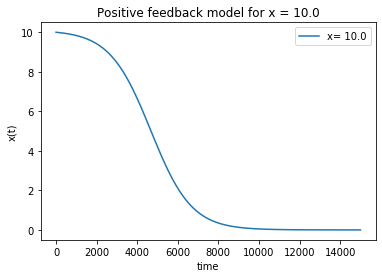

The function tents to the value:  0.0003


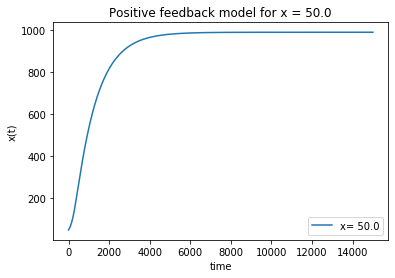

The function tents to the value:  989.8974


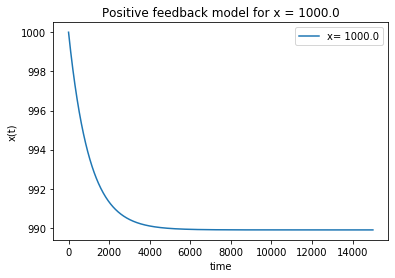

The function tents to the value:  989.898


In [3]:
#time state
t = np.linspace(0, 15000, 1000)

x0=[10,50,1000]
for x in x0:
    y0 = odeint(model, x, t)
    plt.plot(t, y0)
    plt.xlabel('time')
    plt.ylabel('x(t)')
    plt.legend(["x= %.1f" %x])
    plt.title('Positive feedback model for x = %.1f'%x)
    plt.show()
    len_y0=len(y0)

    print("The function tents to the value: ", round(float(y0[len_y0-1]),4))
    y1=round(float(y0[len_y0-1]),3)



In [4]:
print("The threshold values of the initial condition is: ", round((1000-y1),4))


The threshold values of the initial condition is:  10.102


By doing the integration of the differential equation that represent the concentration of the expresse protein, we found that the two equilibrium states of the systems are found at protein concentration of 0.003 nM and of 989.898 nM.

The **threshold value is 10.102** approximately, as we can see on the above graphs obtained by changing the initial condition of the protein concentration. We have use the values 10, 50 and 1000 nM respectively


Observing the three plots with different possible initial conditions tend towards two different stable equilibriums of the system. The initial concentration 10, as it is lower than the threshold tends to a stable state of 0 nM and both the concentration 50 nM and 1000 nM tend to the value 989.898 nM, the former increasing the concentration while the latter decreasing it.

### Question 2 <a class="anchor" id="question-2"></a>
**Consider the following activator-repressor model discussed in class (slide titled “From oscillations to pulses”):**
<img src="ex2.png"/>

**Simulate this model for the following parameter values: a2=0.025 nM/s, b1=15 nM/s, b2=0.8 nM/s, d1=d2=5·10-5 s-1, g=2.5·10-7 nM-1s-1, K1=3000 nM, K2=750 nM, and n=m=2. Vary a1 as shown in the slides. Reproduce the dynamics obtained there.**


* Fist we will define the function of the differential equation 

In [5]:
K1 = 3000
K2 = 750
g = 2.5*10**(-7)
b1 = 15
b2 = 0.8
d1 = d2 = 5*10**(-5)
n = m = 2
y = 0.001
x = 3
a2 = 0.025

# function that returns dx/dt and dy/dt
def dx_dy(y, t,a1):
    """
    ODE exercise 2
    """
    x, y = y[0], y[1]
    
    dxdt = (a1+((b1*x**n)/(K1**n + x**n)))-g*x*y-d1*x
    dydt = (a2+((b2*x**m)/(K2**m + x**m)))-d2*y

    return [dxdt, dydt]

* We will set the initial state.

In [6]:
# initial state:
y0 = [1, 2]
# time coodinate to solve the ODE for
t = np.linspace(0, 1000000,1000)

* Finally we will plot the dinamic of the 

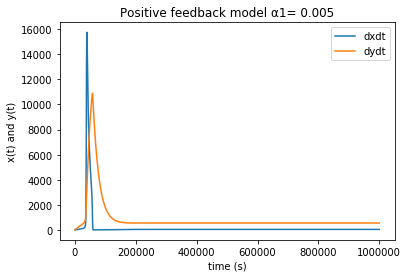

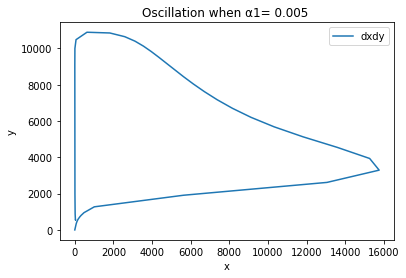

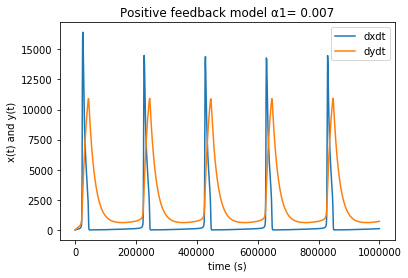

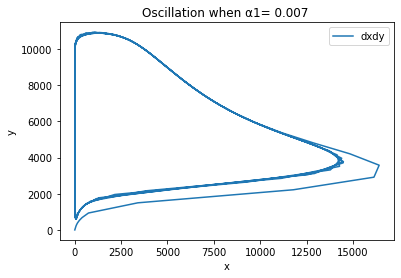

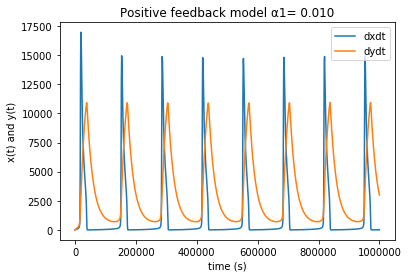

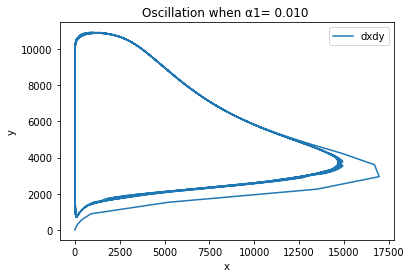

In [7]:
a1=[0.005,0.007,0.01]

for a in a1:
    
    y1 = odeint(dx_dy, y0, t, args=(a,))  
    dx= y1[:,0]
    dyy=y1[:,1]
    plt.plot(t, dx)
    plt.plot(t, dyy)
    plt.xlabel('time (s)')
    plt.ylabel('x(t) and y(t)')
    plt.legend(["dxdt","dydt"])
    plt.title('Positive feedback model α1= %.3f'%a)
    plt.show()
    #oscillation
    plt.plot(dx,dyy)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(["dxdy"])
    plt.title('Oscillation when α1= %.3f '%a)
    plt.show()


As in the above plots, we use the same time frame and kept all the values the same except the a1 value which was modified in order to see how it affects the behaviour of the system. we could notice that If a1 value increases from 0.005 to 0.01 and maintaining the same time frame, we get a more unstable behavior, where the number of pulses increase. In other words, when a1 get values higher than 0.005 the system is less clear and there are more number of oscillations. 


### Question 3.  <a class="anchor" id="question-3"></a>
**The following model describes genetic competence in B. subtilis:**

<img src="ex3.png"/>


**Simulate this model for the parameter values given in the table below:**

<img src="ex3_2.png"/>


**Next, vary the parameters 𝛼k, 𝛼s and 𝛽s (one at a time) and study the response of the system in the different situations. Reproduce the different dynamical regimes studied in class.**


The K and S represent the concentrations of ComK and ComS in the cell, respectively. 
Their basal expression is represented by the parameters:
* αk: Basal expression rate of ComK
* αs: Basal expression rate of ComS, 
maximum rate of regulated expression:

* βk: Saturating expression rate of ComK positive feedback
* βs: Unrepressed expression rate of ComS 



In [8]:
bk = 7.5
dk = ds = 1*10**(-4)
kk=5000
ks= 833
yk = ys = 0.001
Tk=25000
Ts=20
n = 2
p=5
ak = 0.0875
a_s = 0.0004

def dK_dS(y, t,a_k,a_s,bs):
    """
    function that returns the ODE: dK/dt and dS/st
    """
    K, S = y[0], y[1]
    
    dKdt = (a_k+((bk*K**n)/(kk**n + K**n)))-((yk*K)/(1+(K/Tk)+(S/Ts)))-dk*K
    dSdt = (a_s+(bs/(1 + (K/ks)**p)))-((ys*S)/(1+(K/Tk)+(S/Ts)))-ds*S

    return [dKdt, dSdt]

In [9]:
# initial state:
y0 = [1, 0.1]

# time coodinate to solve the ODE for
t = np.linspace(0, 1000000,1000)

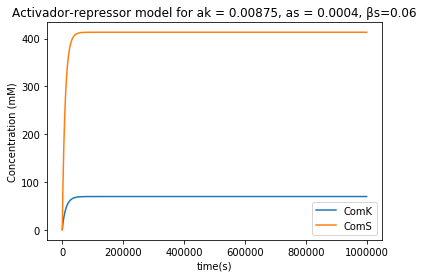

[ComS] tents to the value:  413.255
[ComK] tents to the value:  69.892


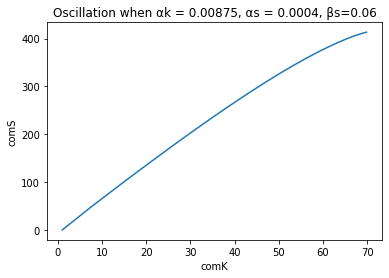

In [10]:
# solve the ODE problem 


a_k = 0.00875
a_s = 0.0004
bs = 0.06
y1 = odeint(dK_dS, y0, t,args=(a_k,a_s,bs))
dK= y1[:,0]
dS=y1[:,1]


plt.plot(t, dK)
plt.plot(t, dS)
plt.xlabel('time(s)')
plt.ylabel('Concentration (mM)')
plt.legend(["ComK","ComS"])
plt.title('Activador-repressor model for ak = 0.00875, as = 0.0004, βs=0.06')
plt.show()
len_yS=len(dS)
len_yK=len(dK)
print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

plt.plot(dK,dS)
plt.xlabel('comK')
plt.ylabel('comS')
plt.title('Oscillation when αk = 0.00875, αs = 0.0004, βs=0.06')


plt.show()



### Changing the basal expression rate of ComK (αk) value. <a class="anchor" id="change-ak"></a> 

#### When ak= 0.000875, 0.0875, 0.875, 2 and 10

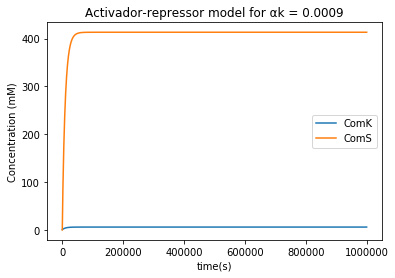

When αk = 0.0009
[ComS] tents to the value:  413.235
[ComK] tents to the value:  6.062


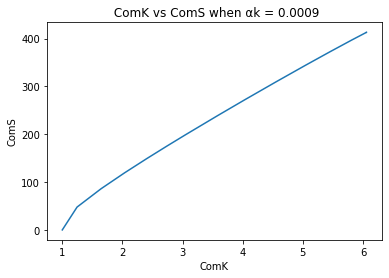

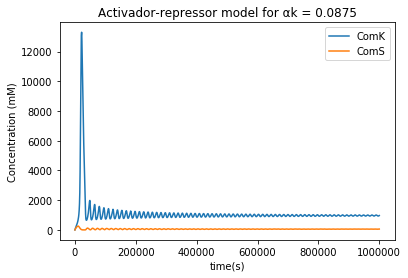

When αk = 0.0875
[ComS] tents to the value:  57.738
[ComK] tents to the value:  966.31


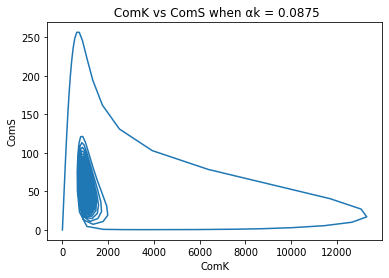

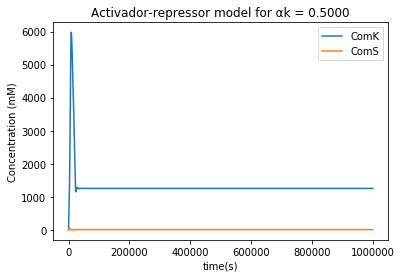

When αk = 0.5000
[ComS] tents to the value:  9.642
[ComK] tents to the value:  1254.614


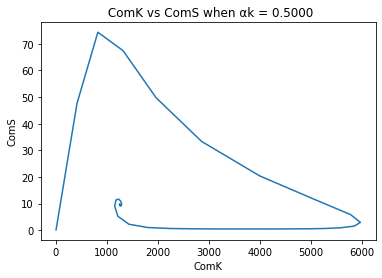

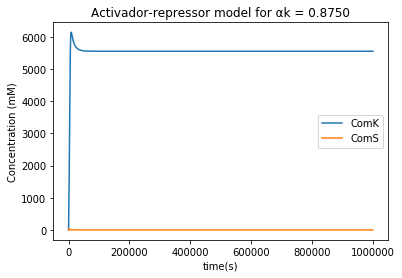

When αk = 0.8750
[ComS] tents to the value:  0.448
[ComK] tents to the value:  5548.956


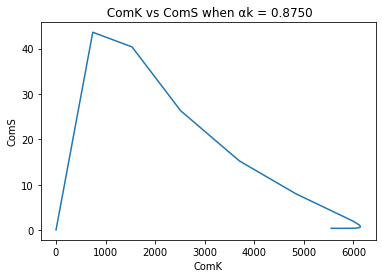

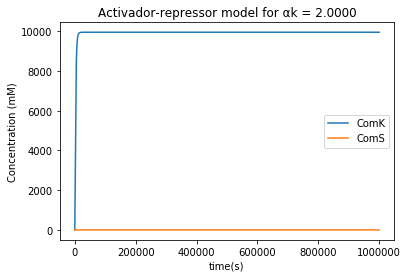

When αk = 2.0000
[ComS] tents to the value:  0.499
[ComK] tents to the value:  9950.873


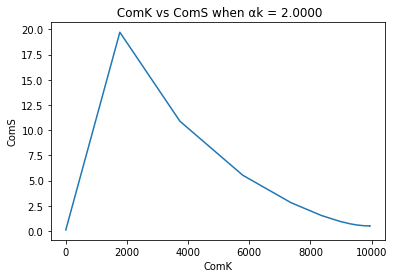

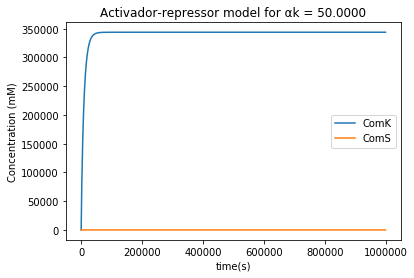

When αk = 50.0000
[ComS] tents to the value:  2.392
[ComK] tents to the value:  343804.813


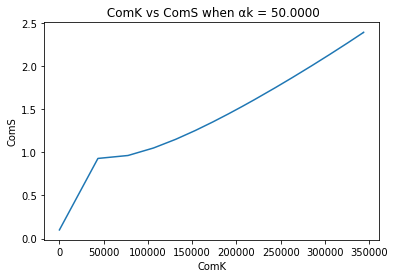

In [11]:
a_k = [0.000875,0.0875,0.5,0.875,2,50]

for ak in a_k:
    a_s = 0.0004
    bs = 0.06

    y1 = odeint(dK_dS, y0, t, args=(ak, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title('Activador-repressor model for αk = %.4f'%ak)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When αk = %.4f" %ak)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))


    plt.plot(dK, dS)
    plt.xlabel('ComK')
    plt.ylabel('ComS')
    plt.title(' ComK vs ComS when αk = %.4f' % ak)

    plt.show()

In this system we have the combination of possitive and negative feedback, ComK and ComS respectivelly.

Observing the plot above, we can notice that when the basal expression rate of ComK gets lower the concentration of ComS does not change whereas the concentration of ComK gets lower as well. For instance, when:
αk = 0.00875 and αk = 0.0009 the concentration of ComS is 413.235 mM. This may be the reason that there are not oscillation behavior of the system since the ComS is supressing the expression of ComK in a negative feedback. That stable fixed point corresponds to the vegetative state.

However when the basal expression rate of ComK gets higher values ( αk = 0.0875 to 0.875) we can notice that the concentration of ComS decrease significantly (from 57.728 to 0.448) while the concentration on ComK gets much higher (from 966.518 to 5548.956 mM). These may be because the ComS is not expressed enough to inhibit the expression of ComK. Also, we can see that within these values the system is unstable. The system exhibits limit cycle oscillations between a mid-ComK and a high-ComK level. In this case oscillation of the system is clearer to see. In contrast, with lower values of αk there are not oscillation, we can see that the curve tends to the 400 mM and there not a recirculation of the reaction. But when αk get higher values than 0.5 the oscillation dissapear and the system reach a higher concentration of ComK but it stays in a stable state whitout concentration changes in ComS and ComK.


### Changing the basal expression rate of ComS (αs) value <a class="anchor" id="change-as"></a> 

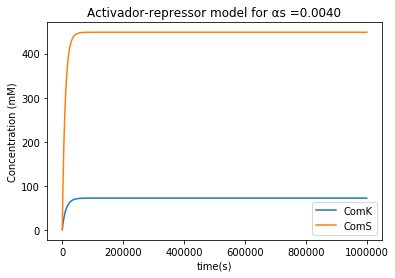

When αs = 0.0040
[ComS] tents to the value:  448.558
[ComK] tents to the value:  72.322


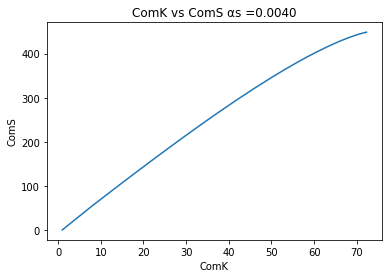

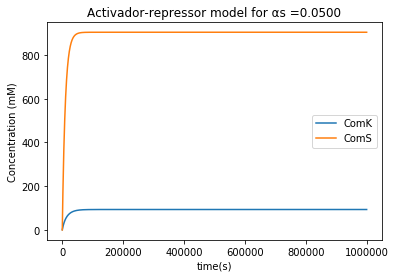

When αs = 0.0500
[ComS] tents to the value:  904.333
[ComK] tents to the value:  93.482


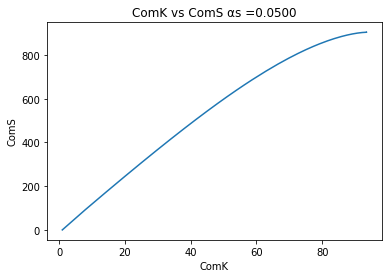

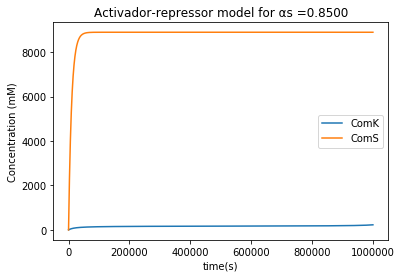

When αs = 0.8500
[ComS] tents to the value:  8899.643
[ComK] tents to the value:  229.975


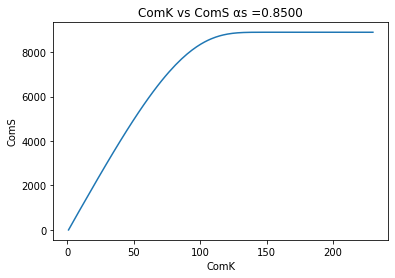

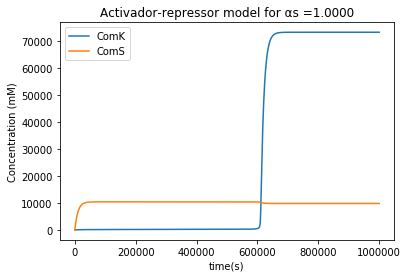

When αs = 1.0000
[ComS] tents to the value:  9801.591
[ComK] tents to the value:  73256.832


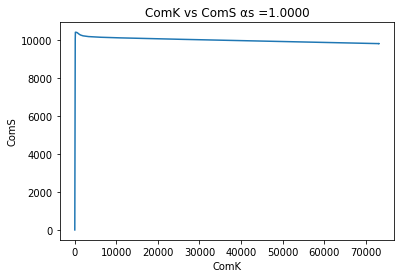

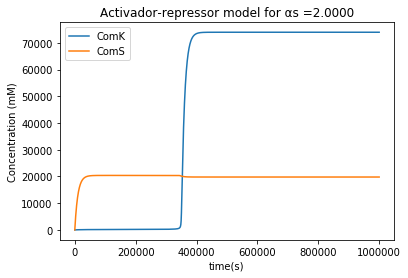

When αs = 2.0000
[ComS] tents to the value:  19800.797
[ComK] tents to the value:  74002.184


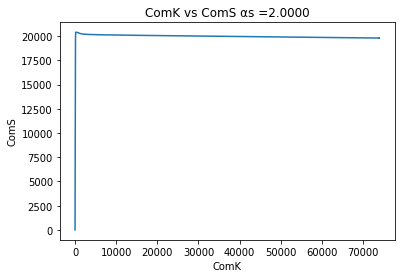

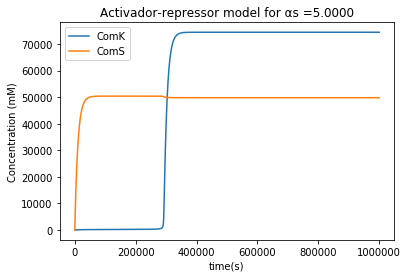

When αs = 5.0000
[ComS] tents to the value:  49800.319
[ComK] tents to the value:  74452.236


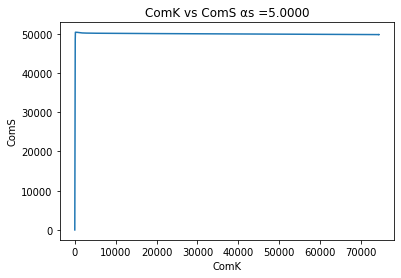

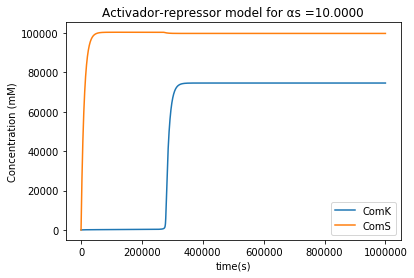

When αs = 10.0000
[ComS] tents to the value:  99800.16
[ComK] tents to the value:  74602.729


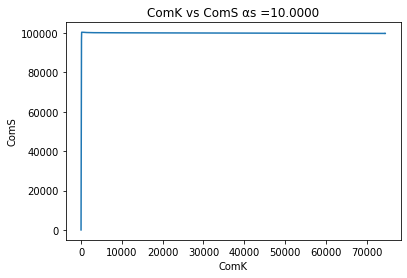

In [12]:
# solve the ODE problem 
a_s1 = [0.004,0.05,0.85,1,2,5,10]

for a_s in a_s1:
    a_k = 0.00875
    bs = 0.06

    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["ComK","ComS"])
    plt.title('Activador-repressor model for αs =%.4f'%a_s)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When αs = %.4f" %a_s)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS)
    plt.xlabel('ComK')
    plt.ylabel('ComS')
    plt.title('ComK vs ComS αs =%.4f' % a_s)

    plt.show()
    
    

Observing the behaviour of the system when we change the value of the basal expression rate of ComS, we can notice that raising the value form 0.0004 to 0.8 the concentration of comS increase significantly faster than the concentration of ComK. Once these concentration get its maximum value they stay in a stable state. In other words, they do not change along the time. So, it makes sense that there are not oscillation in the system. However, once the αs is higher than 0.85 the behaviour changes. Now we can see that the concentration of ComK increase sharply from 0 to 74500 nm at a certain moment of time, whereas the concentration of ComS remains the same all the time. Although, we can also notice that the higher is the αs the higher concentration values comes gets while the max concentration of ComK doesn't change, but the time in which comic reach its maximum concentration gets smaller.
In addition, we can notice that the change of the αs does not produce any oscillation state or unstable state. 

### Changing unrepressed expression rate of ComS (βs) variable: <a class="anchor" id="change-bs"></a> 

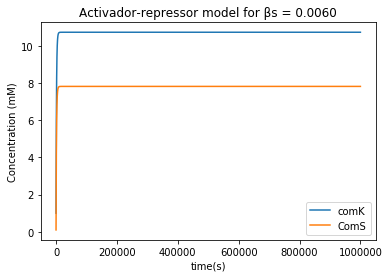

When βs = 0.0060
[ComS] tents to the value:  7.817
[ComK] tents to the value:  10.729


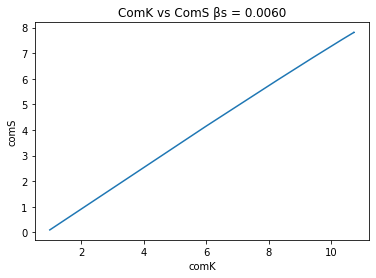

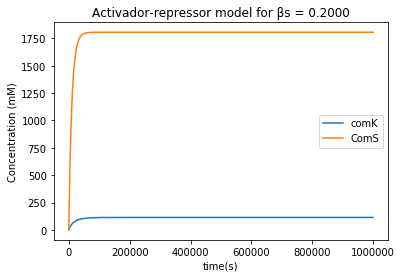

When βs = 0.2000
[ComS] tents to the value:  1806.104
[ComK] tents to the value:  113.96


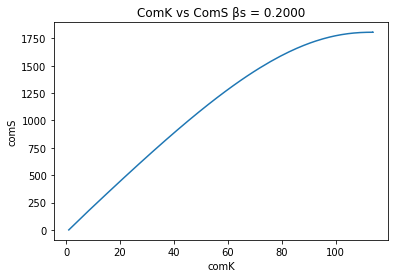

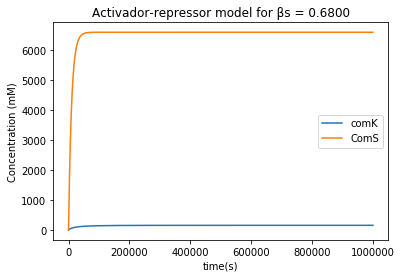

When βs = 0.6800
[ComS] tents to the value:  6603.169
[ComK] tents to the value:  153.365


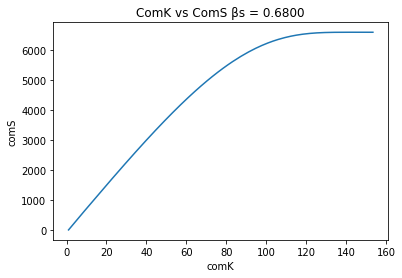

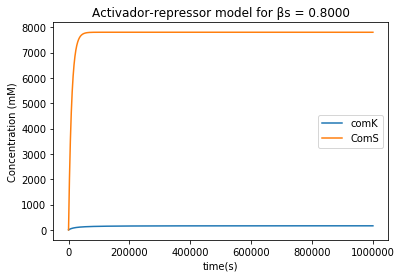

When βs = 0.8000
[ComS] tents to the value:  7802.285
[ComK] tents to the value:  162.067


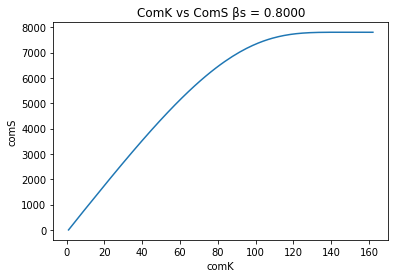

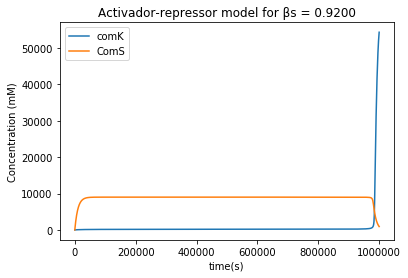

When βs = 0.9200
[ComS] tents to the value:  920.625
[ComK] tents to the value:  54289.4


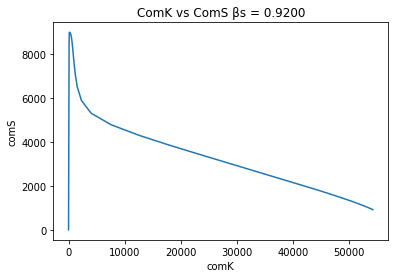

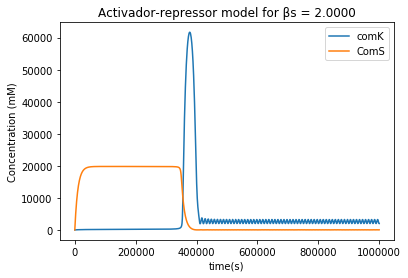

When βs = 2.0000
[ComS] tents to the value:  30.337
[ComK] tents to the value:  2004.643


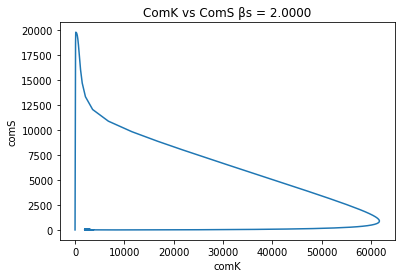

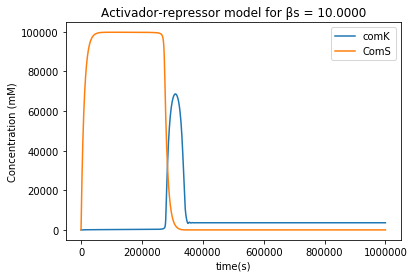

When βs = 10.0000
[ComS] tents to the value:  9.649
[ComK] tents to the value:  3614.644


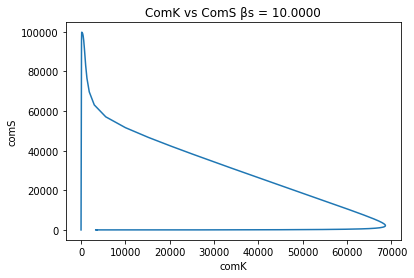

In [13]:
# solve the ODE problem 
bs1 = [0.006,0.2, 0.68,0.8,0.92,2,10]

for bs in bs1:
    a_s = 0.0004
    a_k = 0.00875

    y1 = odeint(dK_dS, y0, t, args=(a_k, a_s,bs))
    dK = y1[:, 0]
    dS = y1[:, 1]
    plt.plot(t, dK)
    plt.plot(t, dS)
    plt.xlabel('time(s)')
    plt.ylabel('Concentration (mM)')
    plt.legend(["comK","ComS"])
    plt.title('Activador-repressor model for βs = %.4f'%bs)
    plt.show()
    len_yS=len(dS)
    len_yK=len(dK)
    print("When βs = %.4f" %bs)
    print("[ComS] tents to the value: ", round(float(dS[len_yS-1]),3))
    print("[ComK] tents to the value: ", round(float(dK[len_yK-1]),3))

    plt.plot(dK, dS)
    plt.xlabel('comK')
    plt.ylabel('comS')
    plt.title('ComK vs ComS βs = %.4f' % bs)

    plt.show()

In the first plot we can see that when we low the βs value the concentration of ComS and ComK decrease significantly, but the first one does it faster than the other one. As we can see that the concentration of ComK get higher values. Also, we can see that the there is not oscillation state, the plot of ComK vs ComS is just a straight line.We can notice that when βs increase its value from 0.06 to 0.92 the concentration of ComS increase extremely fast and the concentration of ComK increase slowly. Within these values the system reaches a steady state without changes and no-oscillation.

However, when βs gets values higher than 0.92 we can start seeing some changes. The concentration of ComK stays lower than ComS but at a certain moment the concentration of ComK increase sharply and as soon as this happens the concentration of ComS drops to the minim. Also, in the following cases we can easily see that this sharp concentration raise happens earlier when βs gets higher values. In addition, we can notice that when βs get higher values such as 2 and 10, the concentration on ComS tends to be higher than ComK from the first period of time and suddenly ComK raises its concentration to its maximum and ComS drops its concentration. Also, it is seen how the concentration of ComK becomes unstable which it can been seen in the oscillation plot how the system is unstable.
We can also say that the pick which is seen in the "ComK vs ComS" plot when βs= 2 and βs= 10 is due to this both changes of concentration.